# OLS Regression Project

## Introduction

For this project, I will be using the dataset provided by NCHS which contains the top 10 Leading causes of death for all the states in America from the year 1999 to 2016. I will frame my own question, for which the answer will be deduced from this dataset and also some additional data which I have collected from sources on the web. I will clean the data and make sure that all the data collected will be organized in a way that best helps answer the question. I will be performing an analysis of the datasets and will also perform visualization to gauge relationships among some key variables. Finally, I will build an Ordinary Least Squares regression model to measure how the independent variable affects the y - variable and to decide if the model is suited to make predictions for future values.

### Datasets used

1) Top 10 Leading causes of death from NCHS

2) Health Insurance Coverage of Total Population in United States from kff.org

3) Median Household Income by State (1984 - 2015) from US Census Bureau

4) US Census Population Data (2010 - 2017)

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Q -  Does the median household income of a state have an effect on the deaths from cancer? 

It may be understood that the greater one’s income, the lower one’s likelihood of disease and premature death. Cancer is a disease that requires significant costs for treatment and patients who cant afford to pay for the treatment have a higher likelihood of death. A higher household income can be considered as a measure of better "economic well-being". Higher-income can also help in getting health insurance from private firms which people with low household income cant afford. But does the median household income have any effect on the deaths due to cancer? We shall be finding out. 

First, we shall be using the dataset provided by the US census bureau which contains the median household income from all the states in the US including the District of Columbia from the year 1999 to 2015. I will also be creating a new dataframe 'incomes_2' which will have the median household incomes from the year 2010 to 2014. I will be removing the row 'United States' which contains the median household income for the whole country.

In [2]:
import pandas as pd
incomes = pd.read_excel('Median Household Income by State 1984 through 2015.xlsx')
new_header = incomes.iloc[0] 

#Remove the United States row
incomes = incomes[1:]
incomes.columns = new_header 
incomes.dropna(axis=1, inplace=True)
incomes.dropna(axis=1, inplace=True)

#incomes from 2010 to 2014
incomes_2 = incomes[incomes.columns[:6]]
incomes_2 = incomes_2[incomes_2['State'] != 'United States']

incomes = incomes[incomes['State'] != 'United States']


incomes.head(3)

,State,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
2,Alabama,42278,47320,43464,42590,40933,39980,44476,42212,37952,37150,36629,37255,37603,35160,35424,36251
3,Alaska,67629,72472,63648,57431,57848,61604,63989,62993,56418,55891,55063,51837,52774,57363,52847,51396
4,Arizona,49254,52611,47044,48621,46896,45739,46914,47215,46657,45245,43846,41166,39734,42704,39783,36995


As we can see above we have our incomes dataframe where the Median Household Incomes for each individual state are provided according to year. But in order to use this dataframe with the Leading Cause of deaths dataframe, I will need to flatten the dataframe under a single column which can then be joined with the NCHS Dataframe. Since the 'States' are sorted ascendingly I will remove the States column and use the .ravel() function to flatten the dataframe and list every income under a single column as shown below.

In [3]:
incomes_2 = incomes_2.drop(['State'], axis = 1)
incomes_2 = pd.DataFrame({'Median_Household_Income':incomes_2.values.ravel()})

incomes = incomes.drop(['State'], axis = 1)
incomes = pd.DataFrame({'Median_Household_Income':incomes.values.ravel()})
incomes.head(5)

,Median_Household_Income
0,42278
1,47320
2,43464
3,42590
4,40933


Now I will be using two additional Datasets:

1) The first of these two datasets will be the population data collected from the US Census Bureau. This Dataset contains the Total Population recorded at mid-year for each state in the United States including the District of Columbia from the year 2010 to 2014. 

2) The second dataset is the Helth insurance coverage dataset from KFF.org which mentions the number of Uninsured people for each state from the year 2010 to 2014. 

I will be creating a new column which will show the percent of uninsured for a state using these two datasets. This will be helpful in seeing if there is any relationship between the Median Household Income of a state to the number of uninsured people in that state.

I will be using the same flattening technique (.ravel() function) used above in order to display all the population and uninsured values under a single column.

In [4]:
# Population Data 2010 - 2014
population = pd.read_csv('population_US_census_data.csv')
print(population.head(4))
population = population.drop(['State'], axis = 1)
population = pd.DataFrame({'Total_Population':population.values.ravel()})
population['Total_Population'] = population['Total_Population'].str.replace(',', '')
population['Total_Population'] = population['Total_Population'].astype(int)


# Uninsured data 2010 - 2014
uninsured = pd.read_csv('uninsured_data.csv')
print(uninsured.head(4))
uninsured = uninsured.drop(['2008', '2009'], axis = 1)
uninsured = uninsured[uninsured['Location'] != 'United States']
uninsured = uninsured.drop(['Location'], axis = 1)
uninsured = pd.DataFrame({'Uninsured':uninsured.values.ravel()})



       State       2014       2013       2012       2011       2010
0   .Alabama  48,42,481  48,30,460  48,15,564  47,98,834  47,85,448
1    .Alaska   7,36,307   7,37,045   7,30,399   7,22,038   7,13,906
2   .Arizona  67,33,840  66,34,999  65,56,629  64,73,497  64,07,774
3  .Arkansas  29,67,726  29,59,549  29,52,109  29,40,407  29,21,978
        Location      2014      2013      2012      2011      2010      2009  \
0  United States  36342200  44845800  45212400  46031700  46912100  44759100   
1        Alabama    564800    642900    624300    661100    686800    632500   
2         Alaska    123700    130900    143500    139100    124100    136000   
3        Arizona    896900   1123300   1117200   1085700   1061900   1191900   

         2008  
0  45314300.0  
1    634500.0  
2    137300.0  
3   1127100.0  


The main dataset provided by NCHS is based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics.
Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. Populations used for computing death rates after 2010 are postcensal estimates based on the 2010 census, estimated as of July 1, 2010. Rates for census years are based on populations enumerated in the corresponding censuses.

Since we are focusing on cancer death rates I will be extracting rows that have Cancer as the 'Cause Name'. I will also be removing the rows which have the United States as the state values. I will be creating another additional dataset which will contain the cancer deaths from the year 2010 - 2014. This is due to some visualization that I will be performing later.

In [5]:
x = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')
x.sort_values('Year', inplace = True, ascending = False)
x = x.rename(columns = {'Age-adjusted Death Rate': 'Death_rate'})

# Leading causes of Death by NCHS
df = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')
df.sort_values('Year', inplace = True, ascending = False)
df = df.rename(columns = {'Age-adjusted Death Rate': 'Death_rate'})
df.head(3)

,Year,113 Cause Name,Cause Name,State,Deaths,Death_rate
1215,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,44965,13.5
7022,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Florida,12561,54.9
4669,2016,Alzheimer's disease (G30),Alzheimer's disease,Iowa,1415,31.3


In [7]:
# 2010 - 2014 NCHS Cancer dataframe
df_3 = df[df['State'] != 'United States']
df_3 = df[df['Cause Name'] == 'Cancer']
df_3 = df_3.loc[df_3['Year'].isin([2010, 2011, 2012, 2013, 2014])]
df_3

# NCHS Cancer only united states 1999-2014
df_1 = x[x['State'] == 'United States']
df_1 = df_1[df_1['Cause Name'] == 'Cancer']
df_1 = df_1.query('Year != 2016 and Year != 2015')

#NCHS without United states, cancer 1999 - 2014
df = df[df['State'] != 'United States']
df = df[df['Cause Name'] == 'Cancer']
df.sort_values(['State', 'Year'], inplace=True,ascending = [True, False])
df = df.query('Year != 2016 and Year != 2015')
df = df.drop(['113 Cause Name'], axis = 1)


In order to be able to join the incomes, population and uninsured data to this dataframe I will have to reset the index. 

In [8]:
df = df.reset_index()
df = df.drop(['index'], axis = 1)

df_3 = df_3.reset_index()
df_3 = df_3.drop(['index'], axis = 1)

In [9]:
df = df.join(incomes)
df.head(2)

df_3 = df_3.join(incomes_2)
df_3 = df_3.join(population)
df_3 = df_3.join(uninsured)

df_3['Uninsured (%)'] = (df_3['Uninsured'] / df_3['Total_Population']) * 100
df_3['Uninsured (%)'] = df_3['Uninsured (%)'].apply(lambda x: round(x, 2))
df_3

,Year,Cause Name,State,Deaths,Death_rate,Median_Household_Income,Total_Population,Uninsured,Uninsured (%)
0,2014,Cancer,Alabama,10286,177.6,42278,4842481,564800,11.66
1,2013,Cancer,Alabama,10328,182.2,47320,4830460,642900,13.31
2,2012,Cancer,Alabama,10276,185.2,43464,4815564,624300,12.96
3,2011,Cancer,Alabama,10233,187.8,42590,4798834,661100,13.78
4,2010,Cancer,Alabama,10196,191.7,40933,4785448,686800,14.35
...,...,...,...,...,...,...,...,...,...
250,2014,Cancer,Wyoming,922,140.7,55690,582548,70600,12.12
251,2013,Cancer,Wyoming,946,148.2,67441,582123,72600,12.47
252,2012,Cancer,Wyoming,955,154.2,57512,576270,89800,15.58
253,2011,Cancer,Wyoming,936,156.0,54509,567224,85100,15.00


Now we have our updated datasets which have some additional data such as the 'Median Household Income', 'Total Population', 'No of Uninsured citizens', and the 'Percent of Uninsured.'

Now to see which states have the highest and lowest median household incomes I will grouping the original dataframe by Year and State. Then I will be calculating the aggregate sum of Median Household Income for all the states under each year. I will also sort them ascendingly to view the data easily.
Down below I have printed states with the 10 highest and 10 lowest median household incomes in the year 2014. We can use this data to perform some further visualization to grasp a better understanding of the relationship between median household income and Cancer deaths.

In [10]:
state_income = df.groupby(['Year', 'State']).agg({'Median_Household_Income': 'sum', 'Deaths': 'sum'})
group1 = state_income['Median_Household_Income'].groupby(level=0, group_keys=False)
result1 = group1.apply(lambda x: x.sort_values(ascending=False))


state_wise_deaths = pd.DataFrame(result1.transpose())
state_wise_deaths.columns = ['Median_Household_Income']
print("Top 10 States in 2014 with highest Median Household Income")
print(state_wise_deaths.loc[2014].head(10))
print("Top 10 States in 2014 with lowest Median Household Income")
print(state_wise_deaths.loc[2014].tail(10).sort_values('Median_Household_Income'))

Top 10 States in 2014 with highest Median Household Income
                      Median_Household_Income
State                                        
Maryland                                76165
New Hampshire                           73397
Hawaii                                  71223
Connecticut                             70161
District of Columbia                    68277
Alaska                                  67629
Minnesota                               67244
Virginia                                66155
New Jersey                              65243
Utah                                    63383
Top 10 States in 2014 with lowest Median Household Income
                Median_Household_Income
State                                  
Mississippi                       35521
West Virginia                     39552
Alabama                           42278
Louisiana                         42406
Kentucky                          42786
Tennessee                         43716
Arkansas   

## Visualization 1

For the first visualization, I will be constructing two graphs which will give better clarity on the relationship between the variables.

The first graph is to see the trend of median household income for the entire country from the year 1999 to 2014. From this graph, we would be able to see if the median household income of the US has increased or decreased over this time.

The second graph will help us see if the Cancer death rates for the entire country has increased or decreased from the year 1999 to 2014. I will be plotting the average age-adjusted cancer death rates for the entire country against the median household income. This can help us determine if the household income has a positive or negative impact on cancer death rates.


In [11]:
yearvsincome = df.groupby(['Year'])
p1 = yearvsincome.agg({'Median_Household_Income': 'mean', 'Death_rate': 'mean'})
p1 = p1.reset_index()

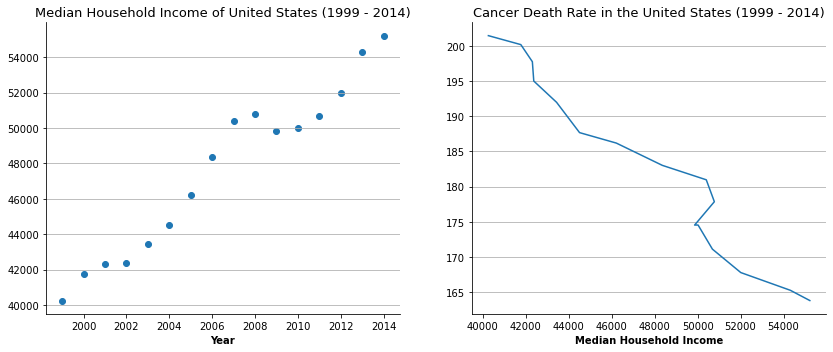

In [12]:
fig = plt.figure(figsize = (12, 5))

ax1 = plt.subplot(1,2,2)
ax2 = plt.subplot(1,2,1)

ax1.plot(p1['Median_Household_Income'], p1['Death_rate'])

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_title('Cancer Death Rate in the United States (1999 - 2014)', loc = 'center', fontdict = {'fontsize': 13})
ax1.set_xlabel('Median Household Income', fontdict = {'fontsize': 10, 'weight': 'bold'})

ax2.scatter(p1['Year'], p1['Median_Household_Income'])

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_title('Median Household Income of United States (1999 - 2014)', loc = 'center', fontdict = {'fontsize': 13})
ax2.set_xlabel('Year', fontdict = {'fontsize': 10, 'weight': 'bold'})

ax1.yaxis.grid()
ax2.yaxis.grid()
plt.tight_layout()



***Summary***: From the two graphs above we can notice some key things. From the first graph, we can see that the median household income of the country has increased over the years. From the second graph, we can also see that the mean age-adjusted cancer death rate for the entire country has decreased as the median household income increases. This analysis can be useful later on. 

## Visualization 2

The higher the median household income of a state the better the chances that the population that is insured for that state are higher as well. Lack of insurance among the relatively lower-income household can result in not being able to pay for the treatment required for Cancer. For the first graph, I will see if the median household income value of a state has any effect on the number of uninsured people in that state.


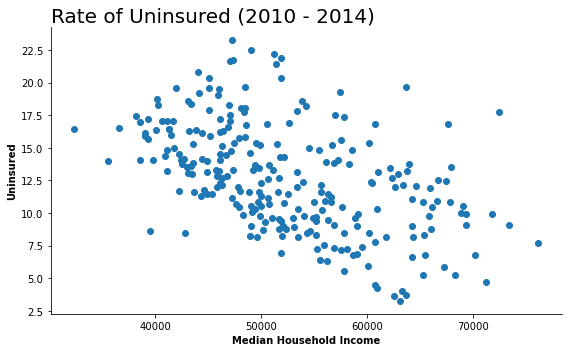

In [13]:
f, ax = plt.subplots(figsize = (8, 5))

ax.scatter(df_3['Median_Household_Income'], df_3['Uninsured (%)'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Uninsured', fontdict = {'weight': 'bold'})
ax.set_xlabel('Median Household Income', fontdict = {'weight': 'bold'})
ax.set_title('Rate of Uninsured (2010 - 2014)', fontdict={'size': 20}, loc = 'left')

plt.tight_layout()
plt.show()

***Summary:*** As we can see from the above scatterplot the percent who are uninsured decreases as the median household income of a state inceases. This can suggest that our intital assumption might be right. We will be looking at a final visualization.

## Visualization 3

For the final visualization I will be comparing the death rates of 5 states by looking at how the cancer death rates of each individal state vary with the median household income of those states. This can clarify if a tate with a higher median household income such as Maryland has a lower cancer death rate than say Mississippi whihc hasone of the lowest median household income of all states in america for the year 2014.

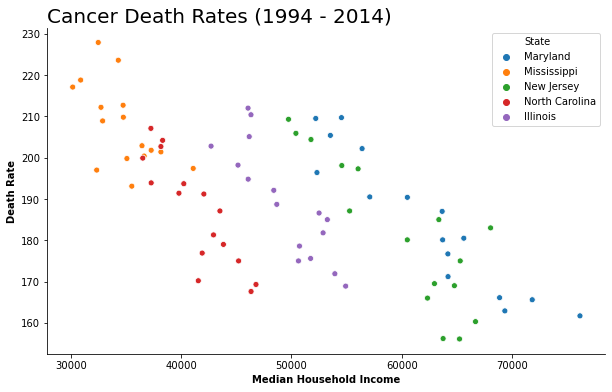

In [14]:
MD = df[df['State'] == 'Maryland']
MS = df[df['State'] == 'Mississippi']
NJ = df[df['State'] == 'New Jersey']
NC = df[df['State'] == 'North Carolina']
IL = df[df['State'] == 'Illinois']

df_2 = pd.concat([MD, MS, NJ, NC, IL])

f, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(df_2['Median_Household_Income'], df_2['Death_rate'], hue = df_2['State'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Death Rate', fontdict = {'weight': 'bold'})
ax.set_xlabel('Median Household Income', fontdict = {'weight': 'bold'})

plt.title('Cancer Death Rates (1994 - 2014)', fontdict={'size': 20}, loc = 'left')

plt.show()

***Summary:*** As we can see from. the graph above countries with a higher median household income such as Maryland and New Jersey have a significantly lower cancer death rate than states with lower median household incomes such as Mississippi and North Carolina.

## OLS Model

Finally I will build an OLD model where the independent X variable will be Median Household Income and the dependent Y Variable will be the cancer death rates. By constructing the model we can gauge if it is accurate enough to give predictions for cancer death rates.

In [15]:
from statsmodels.formula.api import ols
formula = "Death_rate ~ Median_Household_Income"
model_ols = ols(formula = formula , data = df).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death_rate   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     460.4
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           2.72e-81
Time:                        22:55:08   Log-Likelihood:                -3422.4
No. Observations:                 816   AIC:                             6849.
Df Residuals:                     814   BIC:                             6858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 249.0226      3.153     78.975      0.000     242.833     255.212
Median_Household_Income    -0.0014   6.51e-05    -21.456      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        9.011   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.157
Skew:                          -0.259   Prob(JB):                       0.0103
Kurtosis:                       2.974   Cond. No.                     2.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***Summary:*** From the results of the OLS model we can see that model has a R Squared value of 0.361, which means the model can predict with an accuracy of 36.1%. There is also some collinearity that we can see between the X and Y variables.

## Final Summary and Learning:

Based on the project implemented there are some key points that we have learned.

1) From the analysis and visualization conducted in the project we can see that the median Household Income certainly has an inverse relationship with cancer death rates. This relationship suggests that to some extent, income and wealth directly support better health and lesser death rates because wealthier people can afford the resources that protect and improve health. In contrast to many low-income people, they tend to have jobs that are more stable and flexible; provide good benefits, like paid leave, health insurance, and worksite wellness programs; and have fewer occupational hazards. More affluent people have more disposable income and can more easily afford medical care and a healthy lifestyle—benefits that also extend to their children.

2) We have also seen that there is an inverse relationship between median household income and the number of uninsured people in a state. This is an important observation as it can be deduced that the higher the number of people who have health insurance the more likely they can afford the treatment required for cancer which results in a lesser likelihood of death.

3) As we have seen the Median Household Income cannot alone help predict cancer death rates. This is due to the omission of various other variables that can play a part in determining the cancer death rate of a state. Some of them can be health insurance costs for each state, parity differences among states, health and sustainability policies and so much more. Also, a better understanding of the health disparities among minorities of a state can help give a better understanding of the demographic which can help improve the performance of the model.